<a href="https://colab.research.google.com/github/Qasim-Shah-73/RevoultDetectFraud/blob/main/DetectFraudLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

In [3]:
# Adjust the file path based on the location of your dataset
fraudsters_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/output.csv'
final_data = pd.read_csv(fraudsters_path)

<ipython-input-3-766464ad0c68>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv(fraudsters_path)


In [4]:
final_data = final_data.drop(['IS_FRAUDSTER'], axis = 1)
mapping = { 'True': 1, 'No': 0 }
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 92 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID_transaction        1048575 non-null  int64  
 1   USER_ID               1048575 non-null  int64  
 2   COUNTRY               1048575 non-null  int64  
 3   TYPE                  1048575 non-null  int64  
 4   STATE                 1048575 non-null  int64  
 5   AMOUNT_GBP            1048575 non-null  float64
 6   CURRENCY              1048575 non-null  int64  
 7   USER_AGE              1048575 non-null  float64
 8   U_AGE_GROUP           1048575 non-null  int64  
 9   fraudster             1048575 non-null  int64  
 10  is_bank_holiday       450359 non-null   float64
 11  hour_of_day_GB        1048575 non-null  int64  
 12  month                 1048575 non-null  int64  
 13  CURRENCIES            1048575 non-null  int64  
 14  T_CREATED_DATE_DAY    1048575 non-

In [5]:
# Extract features and target
X = final_data.iloc[:, :9]  # Features from columns 0 to 8
y = final_data.iloc[:, 9]   # Target in column 9

# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (838860, 9)
X_test shape: (209715, 9)
y_train shape: (838860,)
y_test shape: (209715,)


In [ ]:
# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')




In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
  482/26215 [..............................] - ETA: 2:08 - loss: 0.0081

KeyboardInterrupt: ignored

6554/6554 [==============================] - 17s 3ms/step


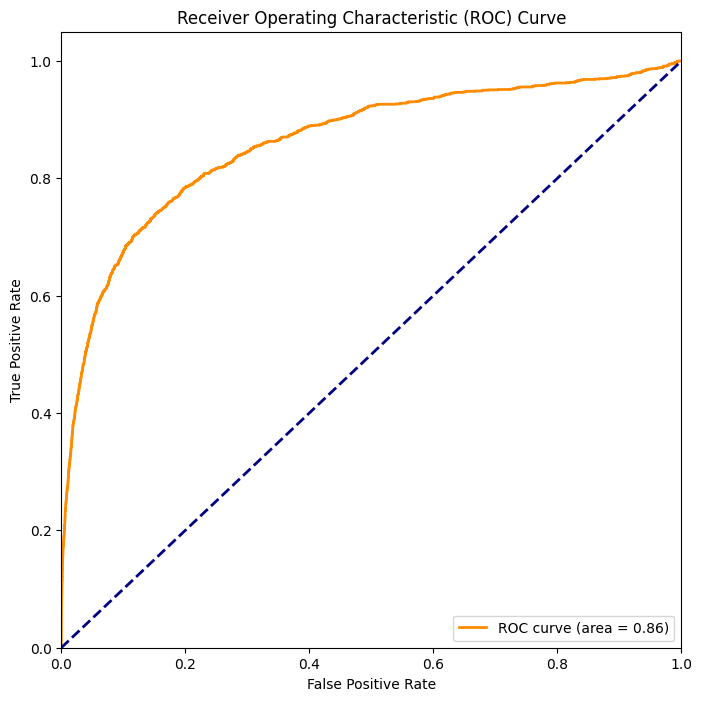

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Confusion Matrix
threshold = 0.5  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208059     27]
 [  1562     67]]


In [ ]:
# Confusion Matrix
threshold = 0.6  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208072     14]
 [  1605     24]]


In [ ]:
# Confusion Matrix
threshold = 0.7  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208082      4]
 [  1622      7]]


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
26215/26215 [==============================] - 184s 5ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 2/10
26215/26215 [==============================] - 138s 5ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 3/10
26215/26215 [==============================] - 133s 5ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 4/10
26215/26215 [==============================] - 140s 5ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 5/10
26215/26215 [==============================] - 140s 5ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 6/10
26215/26215 [==============================] - 141s 5ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 7/10
26215/26215 [==============================] - 131s 5ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 8/10
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 9/10
26215/26215 [==============================] - 129s 5ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 10/10
26215/26215 [=====================

In [ ]:
# Confusion Matrix
threshold = 0.5  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208059     27]
 [  1562     67]]


In [ ]:
# Confusion Matrix
threshold = 0.6  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208072     14]
 [  1605     24]]


In [ ]:
# Confusion Matrix
threshold = 0.7  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208082      4]
 [  1622      7]]


6554/6554 [==============================] - 19s 3ms/step


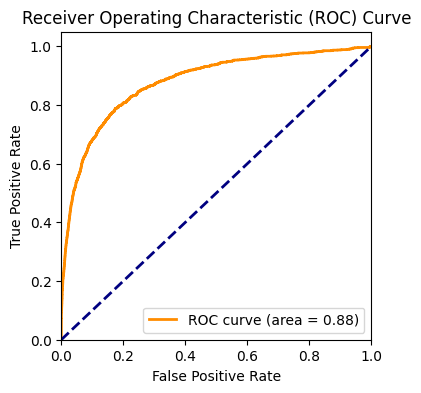

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
final_data = final_data.drop(['IS_FRAUDSTER'], axis = 1)
mapping = { 'True': 1, 'No': 0 }
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)

# Extract features and target
X = final_data.iloc[:, :9]  # Features from columns 0 to 8
y = final_data.iloc[:, 9]   # Target in column 9

# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
26215/26215 [==============================] - 314s 12ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 2/10
26215/26215 [==============================] - 319s 12ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 3/10
26215/26215 [==============================] - 296s 11ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 4/10
26215/26215 [==============================] - 296s 11ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 5/10
26215/26215 [==============================] - 294s 11ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 6/10
26215/26215 [==============================] - 316s 12ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 7/10
26215/26215 [==============================] - 342s 13ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 8/10
26215/26215 [==============================] - 295s 11ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 9/10
26215/26215 [==============================] - 300s 11ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/10
26215/26215 [============

6554/6554 [==============================] - 25s 4ms/step


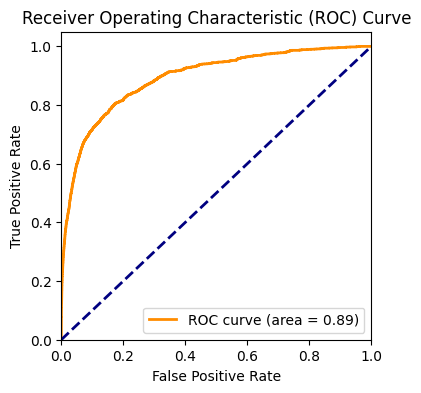

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Confusion Matrix
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208020     66]
 [  1503    126]]


In [ ]:
# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208055     31]
 [  1558     71]]


In [ ]:
# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208069     17]
 [  1578     51]]


In [ ]:
final_data.head(1).iloc[:, 88:]

,year_GB,month_GB,day_GB,hour_GB
0,2019,4,20,19


In [ ]:
transaction_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/transactions.xlsx'
transactions = pd.read_excel(transaction_path)

In [ ]:
# created date for transactions
transactions['CREATED_DATE'] = pd.to_datetime(transactions['CREATED_DATE'])

In [ ]:
transactions.head(1)

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,2019-04-20 18:04:03.930,CARD_PAYMENT,COMPLETED,13.12,PLN


In [ ]:
final_data.head(1).iloc[:,0:30]

,ID_transaction,USER_ID,COUNTRY,TYPE,STATE,AMOUNT_GBP,CURRENCY,USER_AGE,U_AGE_GROUP,fraudster,...,TOPUP_DAY_NO,TOPUP_SUM,TOPUP_DAY_SUM,CARD_PAYMENT_NO,CARD_PAYMENT_DAY_NO,CARD_PAYMENT_SUM,CARD_PAYMENT_DAY_SUM,FEE_NO,FEE_DAY_NO,FEE_SUM
0,1009028,198154,44,1,0,13.12,83,64.0,5,0,...,1,13.12,13.12,1,1,13.12,13.12,1,1,13.12


In [ ]:

# Convert 'CREATED_DATE' to datetime in 'transactions'
transactions['CREATED_DATE'] = pd.to_datetime(transactions['CREATED_DATE'])

# Merge 'final_data' and 'transactions' based on the common identifier
final_data['CREATED_DATE'] = transactions['CREATED_DATE']


In [ ]:
final_data.head(5).iloc[:,88:]

,BALANCE,year_GB,month_GB,day_GB,hour_GB,CREATED_DATE
0,-13.12,2019,4,20,19,2019-04-20 18:04:03.930
1,0.00,2019,5,3,14,2019-05-03 13:09:57.625
2,10.00,2019,4,25,16,2019-04-25 15:37:46.837
3,0.00,2019,4,28,14,2019-04-28 13:52:15.256
4,-9.79,2019,5,13,17,2019-05-13 16:02:12.081


In [ ]:
# Drop the intermediate columns
final_data = final_data.drop(['year_GB', 'month_GB', 'day_GB', 'hour_GB'], axis=1)


In [ ]:
# Convert 'CREATED_DATE' to ordinal
final_data['CREATED_DATE_ORDINAL'] = final_data['CREATED_DATE'].apply(lambda x: x.toordinal())


In [ ]:
# Drop unnecessary columns
final_data = final_data.drop([ 'CREATED_DATE'], axis=1)

# Map the 'is_bank_holiday' column
mapping = {'True': 1, 'No': 0}
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Extract features and target
X = final_data.iloc[:, :9]  # Features from columns 0 to 9, including 'CREATED_DATE_ORDINAL'
y = final_data.iloc[:, 9]   # Target in column 10

# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Reshape data for LSTM
X_normalized_with_time = np.column_stack((X_normalized, final_data['CREATED_DATE_ORDINAL']))
X_train, X_test, y_train, y_test = train_test_split(X_normalized_with_time, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
26215/26215 [==============================] - 363s 14ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 2/10
26215/26215 [==============================] - 327s 12ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 3/10
26215/26215 [==============================] - 353s 13ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 4/10
26215/26215 [==============================] - 319s 12ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 5/10
26215/26215 [==============================] - 337s 13ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 6/10
26215/26215 [==============================] - 329s 13ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 7/10
26215/26215 [==============================] - 319s 12ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 8/10
26215/26215 [==============================] - 319s 12ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 9/10
26215/26215 [==============================] - 338s 13ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 10/10
26215/26215 [============

6554/6554 [==============================] - 28s 4ms/step


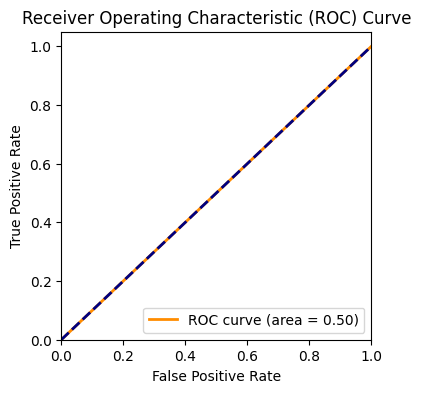

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
q = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
 # Confusion Matrix
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208086      0]
 [  1629      0]]


In [ ]:
model.save('fraud_detect_revoult.h5')

In [ ]:
from google.colab import files

files.download('fraud_detect_revoult.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transactions.columns

Index(['ID', 'USER_ID', 'CREATED_DATE', 'TYPE', 'STATE', 'AMOUNT_GBP',
       'CURRENCY'],
      dtype='object')

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Adjust the file path based on the location of your dataset
#fraudsters_path = 'C:\\Users\\s4225126\\Downloads\\output.csv'
#final_data = pd.read_csv(fraudsters_path)

# Adjust the file path based on the location of your dataset
fraudsters_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/output.csv'
final_data = pd.read_csv(fraudsters_path)

final_data = final_data.drop(['IS_FRAUDSTER'], axis = 1)
mapping = { 'True': 1, 'No': 0 }
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)


# Extract features and target
X = final_data.iloc[:, :9].join(final_data.iloc[:, -81:])
y = final_data.iloc[:, 9]   # Target in column 9

# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

<ipython-input-9-f4e8fc550d53>:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv(fraudsters_path)


X_train shape: (838860, 90)
X_test shape: (209715, 90)
y_train shape: (838860,)
y_test shape: (209715,)
X_train shape: (838860, 1, 90)
X_test shape: (209715, 1, 90)
y_train shape: (838860,)
y_test shape: (209715,)


In [ ]:
# Build the LSTM model
#model = Sequential()
#model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dense(units=1))
#model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
from sklearn.metrics import roc_curve, auc

# Define the number of folds
n_splits = 3

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
roc_auc_scores = []
conf_matrices = []

# Define cutoff values
cutoff_values = [0.6, 0.7]

# Iterate through each fold
for train_index, test_index in kf.split(X_normalized):
    X_train_fold, X_test_fold = X_normalized[train_index], X_normalized[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Reshape data for LSTM
    X_train_fold = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_test_fold = X_test_fold.reshape(X_test_fold.shape[0], 1, X_test_fold.shape[1])

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold))

    # Make predictions on the test set
    y_pred_fold = model.predict(X_test_fold).flatten()

    # Evaluate the model at different cutoff values
    for cutoff in cutoff_values:
        y_pred_binary = (y_pred_fold > cutoff).astype(int)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test_fold, y_pred_binary)
        conf_matrices.append(conf_matrix)

# Print average ROC AUC scores across all folds and cutoff values
print("Average ROC AUC Scores:")
for i, cutoff in enumerate(cutoff_values):
    avg_roc_auc = np.mean(roc_auc_scores[i::len(cutoff_values)])
    print(f"At Cutoff {cutoff}: {avg_roc_auc}")

# Print average confusion matrices across all folds and cutoff values
print("\nAverage Confusion Matrices:")
for i, cutoff in enumerate(cutoff_values):
    avg_conf_matrix = np.mean(conf_matrices[i::len(cutoff_values)], axis=0)
    print(f"At Cutoff {cutoff}:\n{avg_conf_matrix}")


Epoch 1/10
21846/21846 [==============================] - 121s 5ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 2/10
21846/21846 [==============================] - 118s 5ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 3/10
21846/21846 [==============================] - 114s 5ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 4/10
21846/21846 [==============================] - 133s 6ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 5/10
21846/21846 [==============================] - 132s 6ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 6/10
21846/21846 [==============================] - 132s 6ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 7/10
21846/21846 [==============================] - 132s 6ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 8/10
21846/21846 [==============================] - 131s 6ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 9/10
21846/21846 [==============================] - 113s 5ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 10/10
10923/10923 [=====================

Average ROC AUC Scores:
At Cutoff 0.6: 0.8644833897044277
At Cutoff 0.7: 0.8644833897044277

Average Confusion Matrices:
At Cutoff 0.6:
[[3.46802000e+05 3.76666667e+01]
 [2.58600000e+03 9.93333333e+01]]


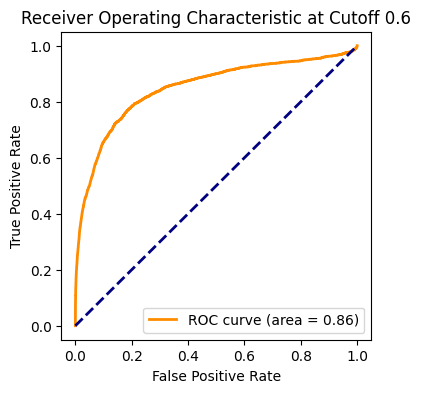

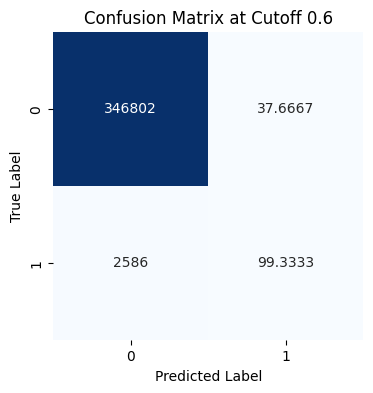

At Cutoff 0.7:
[[3.46819333e+05 2.03333333e+01]
 [2.62666667e+03 5.86666667e+01]]


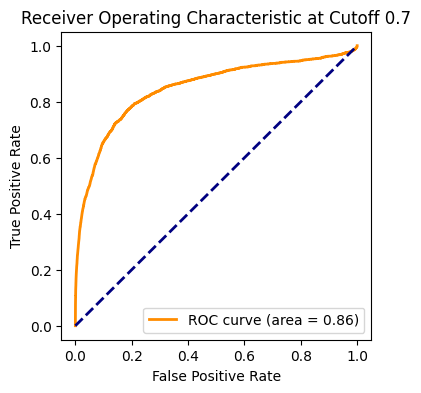

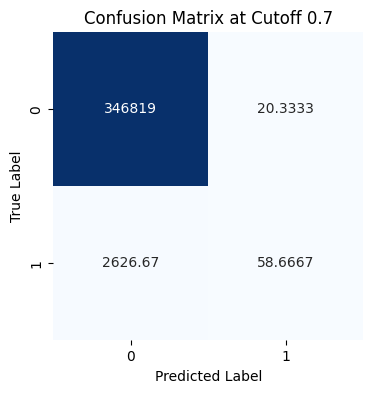

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_value, cutoff):
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic at Cutoff {}'.format(cutoff))
    plt.legend(loc='lower right')
    plt.show()

# Function to display confusion matrix
# Function to display confusion matrix
def display_confusion_matrix(conf_matrix, cutoff):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix at Cutoff {}'.format(cutoff))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Average ROC AUC scores across all folds and cutoff values
print("Average ROC AUC Scores:")
for i, cutoff in enumerate(cutoff_values):
    avg_roc_auc = np.mean(roc_auc_scores[i::len(cutoff_values)])
    print(f"At Cutoff {cutoff}: {avg_roc_auc}")

# Average confusion matrices across all folds and cutoff values
print("\nAverage Confusion Matrices:")
for i, cutoff in enumerate(cutoff_values):
    avg_conf_matrix = np.mean(conf_matrices[i::len(cutoff_values)], axis=0)
    print(f"At Cutoff {cutoff}:\n{avg_conf_matrix}")

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, avg_roc_auc, cutoff)

    # Display confusion matrix
    display_confusion_matrix(avg_conf_matrix, cutoff)


In [ ]:
from sklearn.metrics import roc_curve, auc

# Define the number of folds
n_splits = 3

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
roc_auc_scores = []
conf_matrices = []

# Define cutoff values
cutoff_values = [0.6, 0.7]

# Iterate through each fold
for train_index, test_index in kf.split(X_normalized):
    X_train_fold, X_test_fold = X_normalized[train_index], X_normalized[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Reshape data for LSTM
    X_train_fold = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_test_fold = X_test_fold.reshape(X_test_fold.shape[0], 1, X_test_fold.shape[1])

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]), return_sequences=True))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold))

    # Make predictions on the test set
    y_pred_fold = model.predict(X_test_fold).flatten()

    # Evaluate the model at different cutoff values
    for cutoff in cutoff_values:
        y_pred_binary = (y_pred_fold > cutoff).astype(int)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test_fold, y_pred_binary)
        conf_matrices.append(conf_matrix)

# Print average ROC AUC scores across all folds and cutoff values
print("Average ROC AUC Scores:")
for i, cutoff in enumerate(cutoff_values):
    avg_roc_auc = np.mean(roc_auc_scores[i::len(cutoff_values)])
    print(f"At Cutoff {cutoff}: {avg_roc_auc}")

# Print average confusion matrices across all folds and cutoff values
print("\nAverage Confusion Matrices:")
for i, cutoff in enumerate(cutoff_values):
    avg_conf_matrix = np.mean(conf_matrices[i::len(cutoff_values)], axis=0)
    print(f"At Cutoff {cutoff}:\n{avg_conf_matrix}")


Epoch 1/10
21846/21846 [==============================] - 196s 8ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 2/10
21846/21846 [==============================] - 170s 8ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 3/10
21846/21846 [==============================] - 157s 7ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 4/10
21846/21846 [==============================] - 158s 7ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 5/10
21846/21846 [==============================] - 158s 7ms/step - loss: 0.0069 - val_loss: 0.0072
Epoch 6/10
21846/21846 [==============================] - 168s 8ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 7/10
21846/21846 [==============================] - 159s 7ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 8/10
21846/21846 [==============================] - 156s 7ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 9/10
21846/21846 [==============================] - 157s 7ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 10/10
10923/10923 [=====================

Average ROC AUC Scores:
At Cutoff 0.6: 0.872277792790121
At Cutoff 0.7: 0.872277792790121

Average Confusion Matrices:
At Cutoff 0.6:
[[3.46766333e+05 7.33333333e+01]
 [2.53433333e+03 1.51000000e+02]]


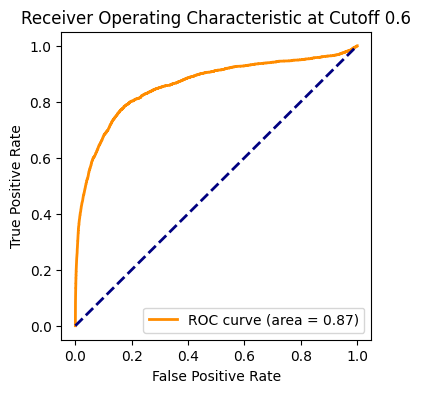

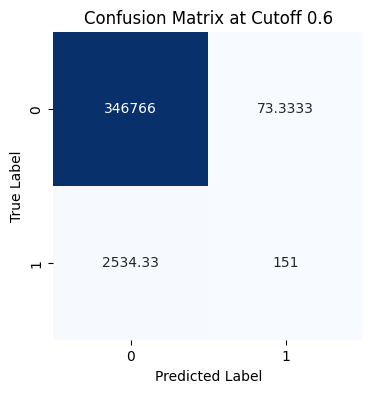

At Cutoff 0.7:
[[3.46803000e+05 3.66666667e+01]
 [2.59966667e+03 8.56666667e+01]]


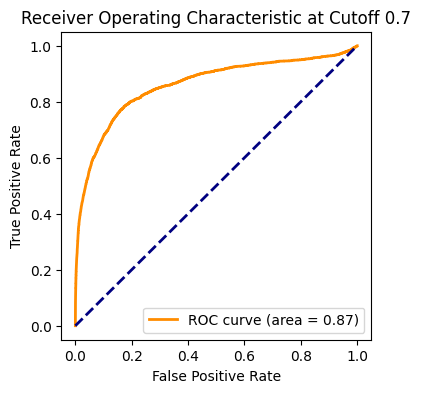

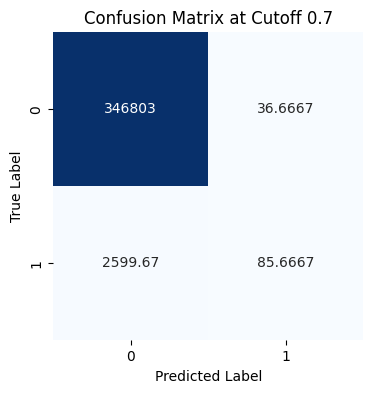

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_value, cutoff):
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic at Cutoff {}'.format(cutoff))
    plt.legend(loc='lower right')
    plt.show()

# Function to display confusion matrix
# Function to display confusion matrix
def display_confusion_matrix(conf_matrix, cutoff):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix at Cutoff {}'.format(cutoff))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Average ROC AUC scores across all folds and cutoff values
print("Average ROC AUC Scores:")
for i, cutoff in enumerate(cutoff_values):
    avg_roc_auc = np.mean(roc_auc_scores[i::len(cutoff_values)])
    print(f"At Cutoff {cutoff}: {avg_roc_auc}")

# Average confusion matrices across all folds and cutoff values
print("\nAverage Confusion Matrices:")
for i, cutoff in enumerate(cutoff_values):
    avg_conf_matrix = np.mean(conf_matrices[i::len(cutoff_values)], axis=0)
    print(f"At Cutoff {cutoff}:\n{avg_conf_matrix}")

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, avg_roc_auc, cutoff)

    # Display confusion matrix
    display_confusion_matrix(avg_conf_matrix, cutoff)


In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))
# Plot the classification model architecture and display it
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')
plt.show()